(Analysis + Dev Env) -> (Data Exploration and Pre-processing) -> Training -> Testing Data -> (Validation with new data)

In [53]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split


# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [12]:
df = pd.read_csv("Data/student_scores.csv", sep = ',')

In [7]:
df.shape

(25, 1)

In [13]:
# get idea of the look
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Clean the data

In [54]:
# to check null values in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

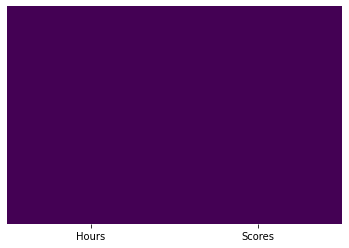

In [55]:
# same visualized
# makes sence if you have null values
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

## Train a model

In [57]:
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

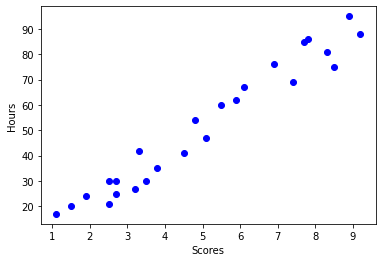

In [58]:
# plot all
plt.ylabel('Hours')
plt.xlabel('Scores')
plt.scatter(X, y, color='blue')
plt.show()

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [61]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [62]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [63]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [72]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [73]:
a

array([[10.46110829]])

In [74]:
b

array([-1.53695733])

In [75]:
y_predicted = myreg.predict(X_test)

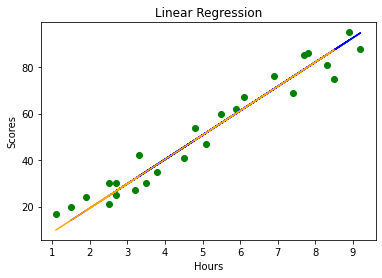

In [77]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [78]:
R2 = myreg.score(X, y)
R2

0.9477059220582453

## Finding a and b in linear regression

In [47]:
#requires dataframe with 2 columns
#made this just for fun, it is not needed for machinelearning which this assignment is about. doesnt work.
def findAandB(df):
    x = df.columns[0]
    y = df.columns[1]
    
    sumX = df[x].sum()
    sumY = df[y].sum()
    n = len(df.index)

    sumXY = 0
    sumXX = 0
    sumYY = 0
    for index, row in df.iterrows():
        sumXY += row[x]*row[y]
        sumXX += row[x]*row[x]
        sumYY += row[y]*row[y]
    
    a = ((sumY*sumXX)-((sumX*sumXY))/n*(sumXX)-sumX*sumX)
    b = (n*(sumXY)-(sumX*sumY))-(n*(sumXX)-sumX*sumX)
    
    return a, b

In [69]:
a, b = findAandB(df)

In [70]:
a

-30116874.961504005

In [71]:
b

33573.23999999999